# **Contour Based Object Detection**

In this model, we detect and count the number of blocks moved from one side of a box to the other by analyzing two input images: a starting image and an ending image, which are the starting and ending frames of the video of the patients performing the Block and Box test. The object detection model works by identifying the region of the tray that was initially empty in the starting image and then detecting changes within that region in the ending image. By thresholding the difference image and analyzing contours within the identified region of the region of interest, the code calculates the number of blocks moved into the empty region.

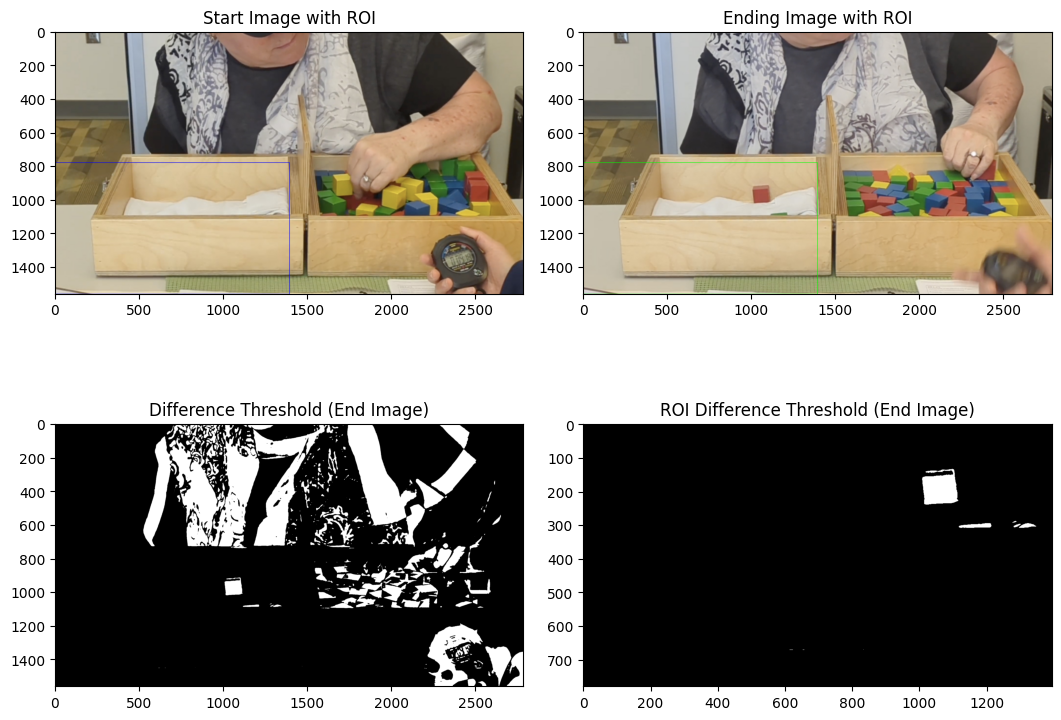

Number of blocks moved (based on contour based object detection): 8


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def count_blocks(img_start_path, img_end_path):
    # load the images
    img_start = cv2.imread(img_start_path)
    img_end = cv2.imread(img_end_path)

    # convert images to grayscale
    gray_start = cv2.cvtColor(img_start, cv2.COLOR_BGR2GRAY)
    gray_end = cv2.cvtColor(img_end, cv2.COLOR_BGR2GRAY)

    # compute the absolute difference to isolate areas of change
    diff_end = cv2.absdiff(gray_start, gray_end)
    _, diff_thresh_end = cv2.threshold(diff_end, 50, 255, cv2.THRESH_BINARY)

    # define region of interests
    h, w = gray_start.shape
    bottom_left_roi = (0, h // 2, w // 2, h // 2)  # (x, y, width, height)
    bottom_right_roi = (w // 2, h // 2, w // 2, h // 2)

    # calculate pixel intensity sums for the two regions in the starting image
    bl_sum = np.sum(gray_start[bottom_left_roi[1]:bottom_left_roi[1] + bottom_left_roi[3],
                                bottom_left_roi[0]:bottom_left_roi[0] + bottom_left_roi[2]])
    br_sum = np.sum(gray_start[bottom_right_roi[1]:bottom_right_roi[1] + bottom_right_roi[3],
                                bottom_right_roi[0]:bottom_right_roi[0] + bottom_right_roi[2]])

    # determine the initially empty box (darker region in the starting image)
    empty_box_roi = bottom_left_roi if bl_sum > br_sum else bottom_right_roi
    x, y, w, h = empty_box_roi

    # Draw the region of interest for visualization
    img_roi_end = img_end.copy()
    img_roi_start = img_start.copy()
    cv2.rectangle(img_roi_end, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(img_roi_start, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # count the white regions in the difference threshold plot within the region of interest
    roi_diff_thresh_end = diff_thresh_end[y:y + h, x:x + w]
    contours_diff_end, _ = cv2.findContours(roi_diff_thresh_end, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    end_block_count = len(contours_diff_end)

    # display images
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 3, 1)
    plt.title("Start Image with ROI")
    plt.imshow(cv2.cvtColor(img_roi_start, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title("Ending Image with ROI")
    plt.imshow(cv2.cvtColor(img_roi_end, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 4)
    plt.title("Difference Threshold (End Image)")
    plt.imshow(diff_thresh_end, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title("ROI Difference Threshold (End Image)")
    plt.imshow(roi_diff_thresh_end, cmap='gray')

    plt.tight_layout()
    plt.show()

    return end_block_count

img_start_path = 'start.JPG'
img_end_path = 'end.JPG'
blocks_moved = count_blocks(img_start_path, img_end_path)
print(f"Number of blocks moved (based on contour based object detection): {blocks_moved}")

Within the specific experiment video used, the actual number of blocks moved was 4. Two yellow blocks have been moved over, but are not visible from the camera angle to the box within the images. Within the image, there are two visible blocks availabe (the red and green blocks), but the countours of the moved cloth within the box and varying contours of the red cube cause the result to deviate from the expected value.